In [173]:
import dicom2nifti
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
from nilearn import plotting
%matplotlib inline

In [174]:
base_folder_path = r'D:\BME\MSc\dl-project\ACDC\database\training'

In [175]:
patient_id = '001'

def get_image_paths(base_folder, patient_id='001'):
    paths = {
        'start_frame': f'patient{patient_id}\patient{patient_id}_frame01.nii.gz',
        'start_frame_gt': f'patient{patient_id}\patient{patient_id}_frame01_gt.nii.gz',
        'end_frame': f'patient{patient_id}\patient{patient_id}_frame12.nii.gz',
        'end_frame_gt': f'patient{patient_id}\patient{patient_id}_frame12_gt.nii.gz'
    }
    return {key: os.path.join(base_folder, value) for key, value in paths.items()}

image_paths = get_image_paths(base_folder_path, patient_id)

image_paths

{'start_frame': 'D:\\BME\\MSc\\dl-project\\ACDC\\database\\training\\patient001\\patient001_frame01.nii.gz',
 'start_frame_gt': 'D:\\BME\\MSc\\dl-project\\ACDC\\database\\training\\patient001\\patient001_frame01_gt.nii.gz',
 'end_frame': 'D:\\BME\\MSc\\dl-project\\ACDC\\database\\training\\patient001\\patient001_frame12.nii.gz',
 'end_frame_gt': 'D:\\BME\\MSc\\dl-project\\ACDC\\database\\training\\patient001\\patient001_frame12_gt.nii.gz'}

In [176]:
def load_images(image_paths):
    loaded_images = {}
    for key, path in image_paths.items():
        loaded_images[key] = nib.load(path).get_fdata()
    return loaded_images

loaded_images = load_images(image_paths)

loaded_images

{'start_frame': array([[[ 0., 27.,  0., ...,  0.,  0.,  0.],
         [ 0., 31.,  0., ...,  0.,  0.,  0.],
         [ 0., 31.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],
 
        [[ 0., 27.,  0., ...,  0.,  0.,  0.],
         [18., 31.,  0., ...,  0.,  0.,  0.],
         [30., 35.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 2.,  0.,  1., ...,  0.,  0.,  0.],
         [ 2.,  0.,  1., ...,  0.,  0.,  0.],
         [ 2.,  0.,  1., ...,  0.,  0.,  0.]],
 
        [[ 0., 30.,  0., ...,  0.,  0.,  0.],
         [19., 30.,  0., ...,  0.,  0.,  0.],
         [30., 32.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 2.,  0.,  1., ...,  0.,  0.,  0.],
         [ 2.,  0.,  1., ...,  0.,  0.,  0.],
         [ 2.,  0.,  1., ...,  0.,  0.,  0.]],
 
        ...,
 
        [[ 0.,  0.,  0., ...,  0.,  1.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],

In [177]:
""" def plot_images(loaded_images):
    image_keys = [key for key in loaded_images.keys()]
    for key in image_keys:
        if key in loaded_images and '_gt' not in key:
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(loaded_images[key][:, :, loaded_images[key].shape[2] // 2], cmap='gray')
            plt.title(f'{key} (Main Image)')
            plt.colorbar()
            plt.axis('off')
        else:
            plt.subplot(1, 2, 2)
            plt.imshow(loaded_images[key][:, :, loaded_images[key].shape[2] // 2], cmap='gray')
            plt.title(f'{key} (Ground Truth)')
            plt.colorbar()
            plt.axis('off')
            plt.suptitle(f'patient ' + patient_id)
            plt.show()

plot_images(loaded_images) """

" def plot_images(loaded_images):\n    image_keys = [key for key in loaded_images.keys()]\n    for key in image_keys:\n        if key in loaded_images and '_gt' not in key:\n            plt.figure(figsize=(10, 4))\n            plt.subplot(1, 2, 1)\n            plt.imshow(loaded_images[key][:, :, loaded_images[key].shape[2] // 2], cmap='gray')\n            plt.title(f'{key} (Main Image)')\n            plt.colorbar()\n            plt.axis('off')\n        else:\n            plt.subplot(1, 2, 2)\n            plt.imshow(loaded_images[key][:, :, loaded_images[key].shape[2] // 2], cmap='gray')\n            plt.title(f'{key} (Ground Truth)')\n            plt.colorbar()\n            plt.axis('off')\n            plt.suptitle(f'patient ' + patient_id)\n            plt.show()\n\nplot_images(loaded_images) "

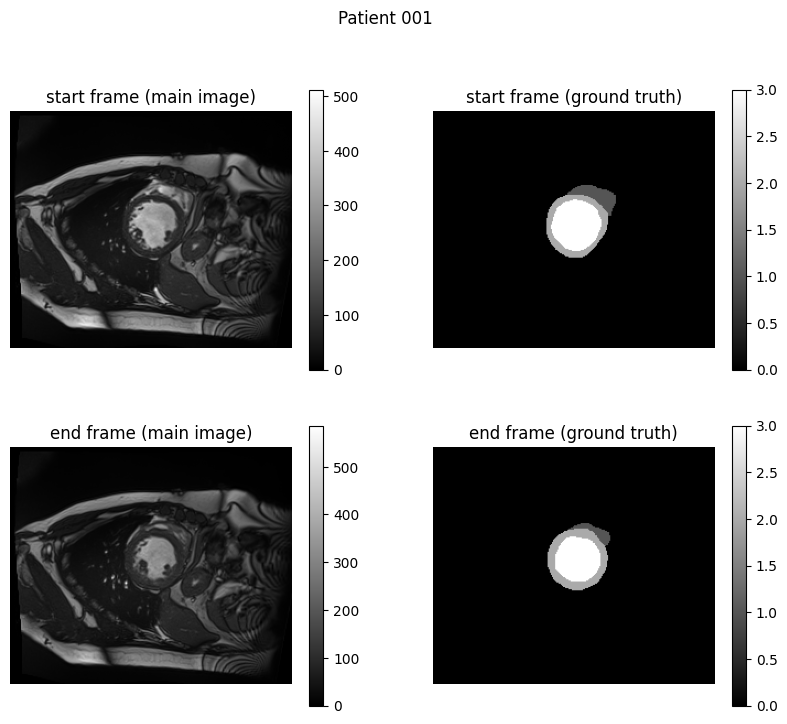

In [178]:
def plot_images(loaded_images):
    plt.figure(figsize=(10, 8))
    image_keys = [key for key in loaded_images.keys()]
    titles = ['start frame (main image)', 'start frame (ground truth)', 'end frame (main image)', 'end frame (ground truth)']

    for i, key in enumerate(image_keys):
        plt.subplot(2, 2, i+1)
        current_image = loaded_images[key]
        plt.imshow(current_image[:, :, current_image.shape[2] // 2], cmap='gray')
        plt.title(titles[i])
        plt.colorbar()
        plt.axis('off')

    plt.suptitle(f'Patient {patient_id}')
    plt.show()

plot_images(loaded_images)